In [1]:
using DelimitedFiles, FileIO
using Plots, Rsvg, LaTeXStrings
using Chemfiles, JUMD, NamedArrays
using LinearAlgebra, Statistics, StatsPlots
pdb = "1xdx"
casa_nma = string("/home/pbarletta/labo/20/bisana/run/nma_1xdx")
casa_full_nma = string("/home/pbarletta/labo/20/bisana/run/full_nma_1xdx")
casa_10_nma = string("/home/pbarletta/labo/20/bisana/run/10_nma_1xdx")
casa_nma_16 = string("/home/pbarletta/labo/20/bisana/run/nma_1xdx_16")
casa_15 = string("/home/pbarletta/labo/20/bisana/run/15_1xdx")
casa_pca = string("/home/pbarletta/labo/20/bisana/run/pca_1xdx")
rtdos = "/home/pbarletta/labo/20/bisana/rtdos_log"

"/home/pbarletta/labo/20/bisana/rtdos_log"

### Volúmenes de cavidades 1xdx

In [2]:
n_rmn = 15
vol_acb = Array{Float64, 1}(undef, n_rmn)
vol_adb = Array{Float64, 1}(undef, n_rmn)

for i in 1:n_rmn
    vol_acb[i] = convert(Float64, readdlm(joinpath(
        casa_nma_16, "cavidad", string("vol_acb_", i)))[1, 2])
    vol_adb[i] = convert(Float64, readdlm(joinpath(
        casa_nma_16, "cavidad", string("vol_adb_", i)))[1, 2])
end

### Flexibilidad con modos de Calpha

In [3]:
global flx_acb_ca = Array{Float64, 1}(undef, n_rmn)
global flx_adb_ca = Array{Float64, 1}(undef, n_rmn)

for i in 1:n_rmn
    flx_acb_ca[i] = convert(Float64, readdlm(joinpath(
        casa_nma_16, "cavidad", string(i, "_flx_acb_5")))[1, 2]) 
    flx_adb_ca[i] = convert(Float64, readdlm(joinpath(
        casa_nma_16, "cavidad", string(i, "_flx_adb_5")))[1, 2]) 
end

## Resultados

In [4]:
flx_acb_nmr_pca = readdlm(joinpath(casa_15, "flx_acb_5"))[1, 2]
flx_adb_nmr_pca = readdlm(joinpath(casa_15, "flx_adb_5"))[1, 2]
flx_nmr_pca = mean([ flx_acb_nmr_pca ; flx_adb_nmr_pca ])

flx_acb_md_pca = readdlm(joinpath(casa_pca, "flx_acb_5"))[1, 2]
flx_adb_md_pca = readdlm(joinpath(casa_pca, "flx_adb_5"))[1, 2]
flx_md_pca = mean([ flx_acb_md_pca ; flx_adb_md_pca ])

vol = [ vol_acb ; vol_adb]
flx_nma = [ flx_acb_ca ; flx_adb_ca]

NamedArray([ mean(vol) std(vol) std(vol) / mean(vol) ;
     mean(flx_nma) std(flx_nma) std(flx_nma) / mean(flx_nma) ;
       flx_nmr_pca 0 0 ;
        flx_md_pca 0 0 ],
    ([ "Volume" ; "Rigidity NMA" ; "Rigidity NMR PCA" ; "Rigidity MD PCA"],
        ["μ" ; "std" ; "std / μ"]))

4×3 Named Array{Float64,2}
           A ╲ B │         μ        std    std / μ
─────────────────┼────────────────────────────────
Volume           │   650.645    104.203   0.160153
Rigidity NMA     │ 0.0224084  0.0043843   0.195654
Rigidity NMR PCA │ 0.0225016        0.0        0.0
Rigidity MD PCA  │  0.023267        0.0        0.0

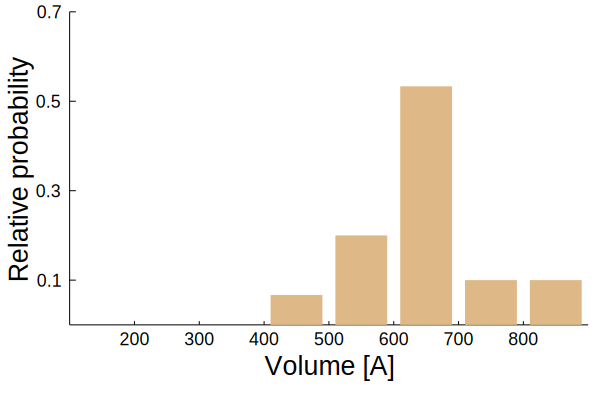

In [5]:
st = 100
min_vol = 100
max_vol = 900
bin_vol = collect(min_vol:st:max_vol)
wgh_vol = fill(1.0, length(vol))

# Histograma ponderado
Wbins_vol_acb, Whis_vol_acb = JUMD.weightedHist(vol, bin_vol, wgh_vol, true, false);

plt_his_vol = bar(Wbins_vol_acb, Whis_vol_acb,
    xlims = (min_vol, max_vol),
    xticks = min_vol+st:st:max_vol-st,
    yticks = .1:.2:.7, ylims = (0, .7),
    linecolor = false, fillcolor = Colors.colorant"BurlyWood",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "Volume [A]
    ")

In [6]:
savefig(plt_his_vol, joinpath(rtdos, string("vol_1xdx", ".svg")))

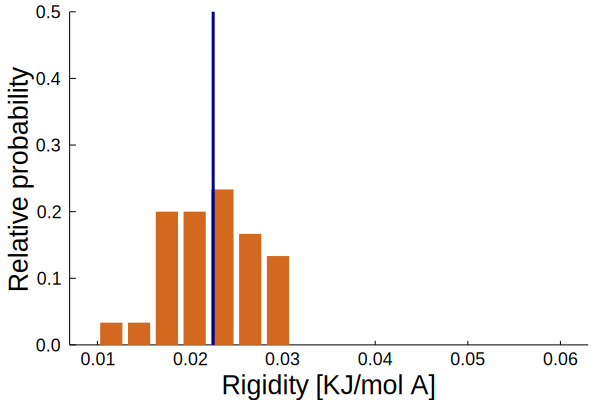

In [7]:
st = .3E-2
min_rig = 0.01
max_rig = 0.06
bin_rig = collect(min_rig:st:max_rig)
wgh_rig = fill(1.0, length(flx_nma))

Wbins_rig_acb, Whis_rig_acb = JUMD.weightedHist(flx_nma, bin_rig, wgh_rig, true, false);

plt_his_rig = bar(Wbins_rig_acb, Whis_rig_acb,
    xlims = (min_rig-st, max_rig+st), ylims = (0, .5),
    xticks = min_rig:1E-2:max_rig,
    name = "1xdx",
    legend = false,
    linecolor = false, fillcolor = Colors.colorant"Chocolate",
    grid = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "Rigidity [KJ/mol A]")

plot!([flx_nmr_pca], seriestype = "vline",
    linecolor = "DarkBlue", linewidth = 3)

In [8]:
savefig(plt_his_rig, joinpath(rtdos, string("rig_1xdx_carmn", ".svg")))

## RMSD

In [9]:
n_rmn = 15
n_rms = n_rmn * (n_rmn - 1) / 2
rmsds = readdlm(joinpath(casa_15, "pdbs", "all_rmsd"))[:, 1];

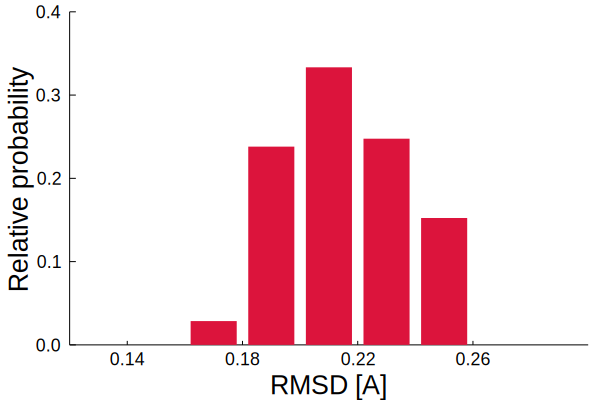

In [10]:
st = 0.02
min_rms = 0.14
max_rms = 0.28
bin_rms = collect(min_rms:st:max_rms)
wgh_rms = fill(1.0, length(rmsds))

Wbins_rms, Whis_rms = JUMD.weightedHist(rmsds, bin_rms, wgh_rms, true, false); 

plt_his_rms = bar(Wbins_rms, Whis_rms,
    xlims = (min_rms-st, max_rms+st), ylims = (0, .4),
    xticks = min_rms:st*2:max_rms,
    name = "1xdx",
    legend = false,
    linecolor = false, fillcolor = Colors.colorant"Crimson",
    grid = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "RMSD [A]")

plot!([flx_nmr_pca], seriestype = "vline",
    linecolor = "DarkBlue", linewidth = 3)

In [11]:
savefig(plt_his_rms, joinpath(rtdos, string("rms_1xdx", ".svg")))

In [12]:
NamedArray([ mean(rmsds) std(rmsds) std(rmsds) / mean(rmsds) ],
    (["RMSD CA" ], ["μ" ; "std" ; "μ/std"]))

1×3 Named Array{Float64,2}
  A ╲ B │         μ        std      μ/std
────────┼────────────────────────────────
RMSD CA │  0.215362  0.0219121   0.101746